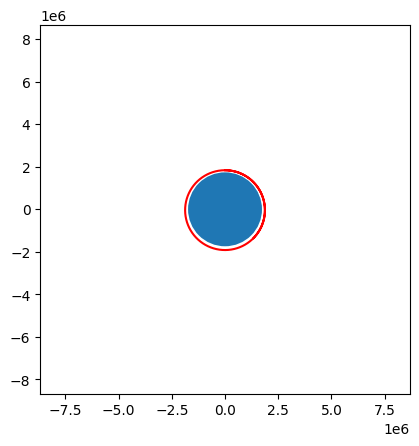

1340142.5384942624 1903334.9117722553
0
0


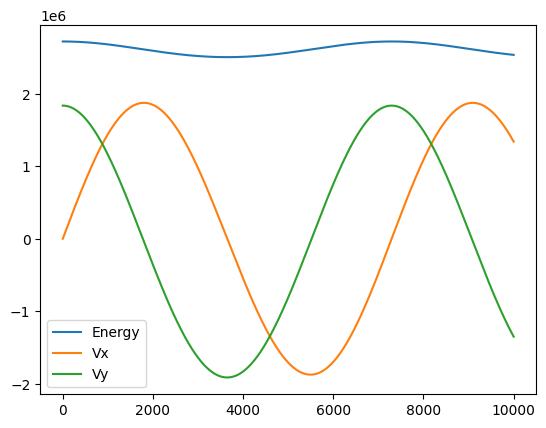

In [119]:
import math
import matplotlib.pyplot as plt
import numpy as np

# Bundeled Data for visualisation
XBundle = []
YBundle = []

# Initial Small Object Conditions
XPos1 = 0
YPos1 = 1737400 + 100000
XVel1 = 1650
YVel1 = 0
XAccel1 = 0
YAccel1 = 0

# Large Object Conditions
XPos2 = 0
YPos2 = 0
Object2Mass = 7.3476731e+22
Object2Radius = 1737400 

# Physics Constants
GravConstant =  6.67e-11

# Physics update steps per second and max simulation time

StepsPerSecond = int(input("How many physics simulation steps per second? "))
MaxSimulationTime = int(input("How long would you like the simulation to be (in seconds)? "))

# Definitions before simulation
velbundley = []
velbundlex = []
velbundlet = []
timebundle = []
dt = 1 / StepsPerSecond
t = 0
counter = 0


# Movement and position updates, the equations are derived from the universal gravitational equation and trigonometry.
simulating = True
while simulating == True:
    # t is the current time, dt is the change in time that is defined by StepsPerSecond
    t = t + dt
    
    # Tracking positions and velocities of X and Y over time by storing them in lists that are equivelant to the time steps
    XBundle.append(XPos1)
    YBundle.append(YPos1)
    velbundley.append(YVel1)
    velbundlex.append(XVel1)
    
    TotalVel = (XVel1 ** 2) + (YVel1 ** 2)
    velbundlet.append(TotalVel)
    timebundle.append(t)
    XSeperation = (XPos1 - XPos2)
    YSeperation = (YPos1 - YPos2)
    Seperation = (((XSeperation ** 2) + (YSeperation ** 2)) ** 0.5)
    
    # Angle definition from x and y seperation
    Angle = math.atan2(YSeperation, XSeperation)
    XGravAccel1 = -1 * ((GravConstant * Object2Mass) / (Seperation ** 2)) * math.cos(Angle)
    YGravAccel1 = -1 * ((GravConstant * Object2Mass) / (Seperation ** 2)) * math.sin(Angle)

    # Updated Velocity From Acceleration
    XVel1 = XVel1 + XGravAccel1 * dt
    YVel1 = YVel1 + YGravAccel1 * dt
    # Updaated Position From Velocity
    XPos1 = XPos1 + XVel1 * dt
    YPos1 = YPos1 + YVel1 * dt
    
    counter = counter + 1
    if t > MaxSimulationTime:
        break
    if Seperation < Object2Radius:
        break


myplot = (XBundle, YBundle)

figure, axes = plt.subplots() 
Drawing_colored_circle = plt.Circle(( 0 , 0 ), Object2Radius)
axes.set_aspect(1)
axes.set_xlim(-5 * Object2Radius, 5 * Object2Radius)
axes.set_ylim(-5 * Object2Radius, 5 * Object2Radius)
axes.add_artist( Drawing_colored_circle )
plt.plot(XBundle, YBundle, color = 'r', label = 'orbit')
plt.show()

print(XSeperation, Seperation)
print(XAccel1)
print(YAccel1)

plt.plot(timebundle, velbundlet, label = 'Energy')
plt.plot(timebundle, XBundle, label = 'Vx')
plt.plot(timebundle, YBundle, label = 'Vy')
plt.legend()    
plt.show()


